# Introducción al Aprendizaje Automático

## Aprendizaje Supervisado - Evaluación Clasificación I

#### Conjunto de datos

**Ejercicio:** Cargar el mismo dataset de la guía anterior. En una variable `X` seleccionar los atributos y en una variable `y` el target.

In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('C://Users//Usuario//aprendizajeautomatico//IntroduccionAprendizajeAutomatico//res//IAA_Guia_2_clasificacion_binaria.csv')



**Ejercicio:** En una variable `X` seleccionar los atributos y en una variable `y` el target.

In [5]:
X = data.drop('target', axis=1)
y = data['target']

**Ejercicio:** Separar `X` e `y` en datos de entrenamiento (`X_train,y_train`) y de evaluación (`X_test,y_test`), usando la función `train_test_split` de Scikit-Learn. Toma un 70% para entrenamiento y un 30% para evaluación. Recuerda mirar su documentación y fijar el `random_state`. Por último, ten en cuenta que con `X_test,y_test` **no vamos a entrenar el modelo, sino que vamos a usarlos únicamente para evaluar su desempeño**.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

**Ejercicio:** Entrena un árbol de decisión de profundidad máxima 3.


In [8]:
clf = DecisionTreeClassifier(max_depth=3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

**Ejercicio:** visualiza la frontera de decisión usando la función `visualize_classifier` de la guía anterior. Grafica los puntos de entrenamiento y evaluación, con sus respectivas clases (puedes usar el parámetro alpha, otro marker o cambiar el tamaño para diferenciar entre entrenamiento y evaluación). 

In [9]:
# Función que nos ayuda a graficar
# No hace falta que comprandan este bloque de código.
def visualize_classifier(model, X, y, ax=None, proba = False):
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
    ax = ax or plt.gca()
    
    colors_tab10 = plt.cm.tab10.colors
    
    for i, y_value in enumerate(reversed(np.unique(y))):
        ax.scatter(X[y==y_value, 0], X[y==y_value, 1], s=30,
                   zorder=3, alpha = 0.5, color = colors_tab10[i])

    ax.axis('tight')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    # ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    
    if proba:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    
    # Create a color plot with the results    
    Z = -Z + 1
    ax.pcolormesh(xx,yy,Z,cmap='bwr', vmin = 0, vmax=1, alpha = 0.2)

    ax.set(xlim=xlim, ylim=ylim)
    

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


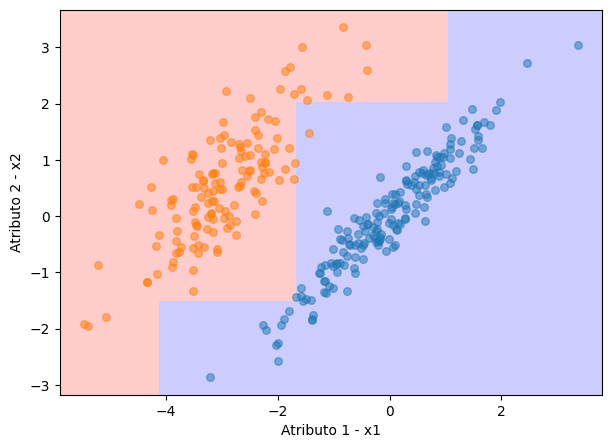

In [10]:
#para entrenamiento
fig, axs=  plt.subplots(1,1, figsize = (7,5))
visualize_classifier(clf, X_train, y_train, ax = axs)
axs.set_xlabel('Atributo 1 - x1')
axs.set_ylabel('Atributo 2 - x2')
plt.show()

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


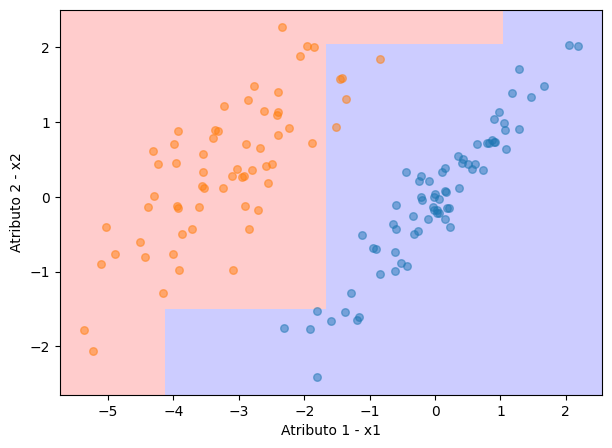

In [11]:
#para pruebas
fig, axs=  plt.subplots(1,1, figsize = (7,5))
visualize_classifier(clf, X_test, y_test, ax = axs)
axs.set_xlabel('Atributo 1 - x1')
axs.set_ylabel('Atributo 2 - x2')
plt.show()

**Ejercicio:** elije una clase como la positiva y otra clase como la negativa. Escribe una función que calcula la matriz de confusión. Aplícala tanto para entrenamiento como para evaluación. No es necesario presentarla en forma de matriz, pero sí es necesario que calcules los totales de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

In [25]:
def confusion_matrix(y, y_pred, positive_class=1):
    PV = NV = PF = NF = 0
    for etiquetaReal, etiquetaPredicta in zip(y, y_pred):
        if etiquetaReal == positive_class:
            if etiquetaPredicta == positive_class:
                PV += 1
            else:
                NF += 1
        else:
            if etiquetaPredicta == positive_class:
                PF += 1
            else:
                NV += 1

    print(f'              | {"Pred. Positiva":^15} | {"Pred. Negativa":^15} |')
    print(f'{"Real Positiva":^10} | {PV:^15} | {NF:^15} |')
    print(f'{"Real Negativa":^10} | {PF:^15} | {NV:^15} |')

    return PV, NV, PF, NF


In [26]:
#ENTRENADO
y_pred = clf.predict(X_train)
confusion_matrix(y_train, y_pred)

              | Pred. Positiva  | Pred. Negativa  |
Real Positiva |       178       |        0        |
Real Negativa |        1        |       136       |


(178, 136, 1, 0)

In [27]:
#EVALUACION
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

              | Pred. Positiva  | Pred. Negativa  |
Real Positiva |       72        |        0        |
Real Negativa |        5        |       58        |


(72, 58, 5, 0)

**Ejercicio:** A partir de las matrices de confusión obtenidas, escribe funciones que calculen la exactitud, la precisión, la exhaustividad (recall) y el F1-score para el clasificador. Es conveniente que llamen a la función que escribiste antes. Aplicar tanto sobre entrenamiento como sobre evaluación.

In [28]:
def exactitud(y, y_pred):
    res = confusion_matrix(y,y_pred)
    return (res[0] + res[1]) / (res[0] + res[1]+ res[2] + res[3])

def precision(y, y_pred):
    res = confusion_matrix(y,y_pred)
    return res[0]  / (res[0] + res[2])

def recall(y, y_pred):
    res = confusion_matrix(y,y_pred)
    return res[0] / (res[0] + res[3])

def f_score(y, y_pred):
    return 2 * ((precision(y,y_pred) * recall(y, y_pred)) / precision(y,y_pred) + recall(y, y_pred)) 

**Ejercicio:** haz un gráfico de exactitud - calculada en entrenamiento y evaluación - en función de `max_depth` para el árbol de decisión. ¿Qué observas? ¿Qué profundidad elegirías para un árbol de decisión en este caso?¿Por qué?

In [30]:
max_depths = np.arange(1, 21)
train_scores = []
test_scores = []

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

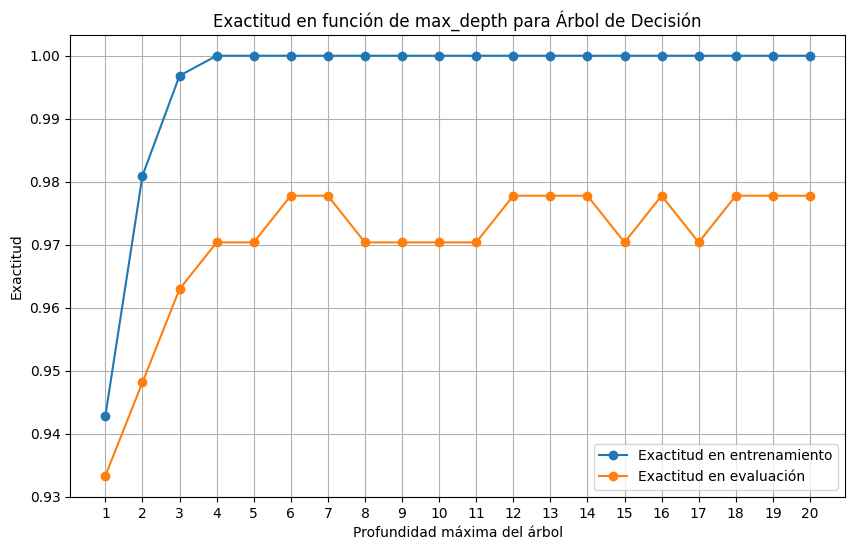

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Exactitud en entrenamiento', marker='o')
plt.plot(max_depths, test_scores, label='Exactitud en evaluación', marker='o')
plt.title('Exactitud en función de max_depth para Árbol de Decisión')
plt.xlabel('Profundidad máxima del árbol')
plt.ylabel('Exactitud')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.show()

**Ejercicio:** buscar en la documentación de Scikit-Learn cómo se calcula la matriz de confusión, las métricas mencionadas y el `classification_report`. Aplicarlos.

In [32]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,  classification_report

## Hay que definir y y y_pred!!!!! asi como esta no corre

# Calcula la matriz de confusión
cm = confusion_matrix(y, y_pred)
print("Matriz de Confusión:")
print(cm)

# Calcula las métricas de evaluación
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("\nMétricas de Evaluación:")
print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Genera el informe de clasificación
report = classification_report(y, y_pred)
print("Informe de Clasificación:")
print(report)


ValueError: Found input variables with inconsistent numbers of samples: [450, 135]

## Conjunto de datos de EverythingALS 

Aplicar los visto al conjunto de datos de EverythingALS. La tarea a realizar es la misma que en la guía anterior. 

**Para pensar e investigar:**

1. ¿Tiene sentido un train-test split por sesiones en este caso? Justificar.

1. ¿Tiene el mismo *peso* un falso positivo que un falso negativo? ¿Por qué?